<a href="https://colab.research.google.com/github/dzhamalovas/ML/blob/main/ML3_2_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Линейно разделимые данные

## Подготовка

In [ ]:
# импорт библиотек
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.datasets import make_blobs

In [ ]:
# генерация датасетов
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)

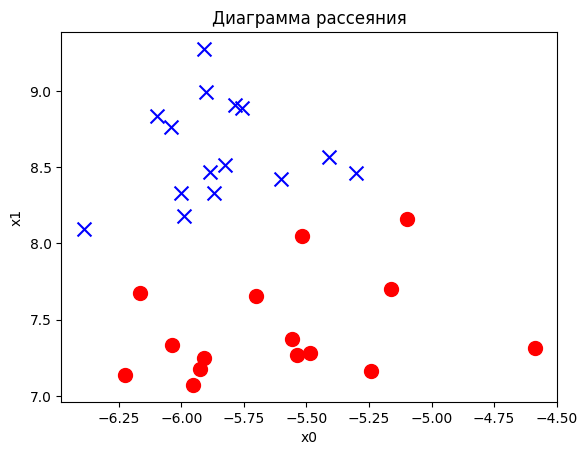

In [ ]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

## Создание и обучение модели классификации

In [ ]:
# обучение
svm_linear = SVC(kernel='linear', C=100)
svm_linear.fit(X, y)

SVC(C=100, kernel='linear')

In [ ]:
# коэффициенты линейной функции
svm_linear.coef_

array([[-2.49920793,  6.14683189]])

In [ ]:
# свободный коэффициент
svm_linear.intercept_

array([-64.2533988])

## Граница принятия решений на графике

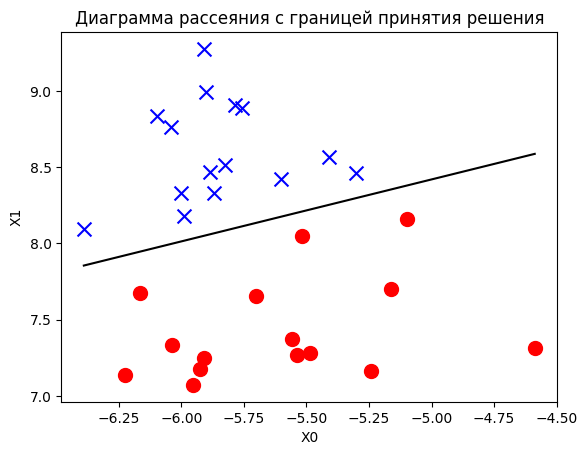

In [ ]:
X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])

plt.plot(X0,-svm_linear.intercept_[0]/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0, c='k')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c границей принятия решения")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

## Координаты опорных векторов

In [ ]:
# координаты опорных векторов
svm_linear.support_vectors_

array([[-5.51629264,  8.04763857],
       [-5.30025769,  8.46071981],
       [-5.9879581 ,  8.18112559]])

In [ ]:
# индексы опорных векторов
svm_linear.support_

array([ 0,  8, 29], dtype=int32)

## Визуализация опорных векторов

In [ ]:
svm_linear.n_support_

array([1, 2], dtype=int32)

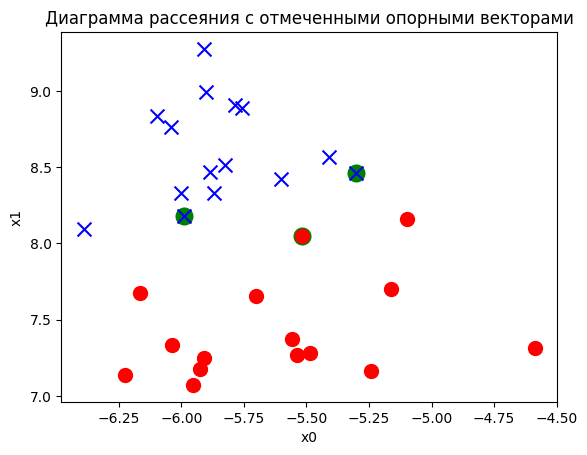

In [ ]:
plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c отмеченными опорными векторами")
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

## Построение границы

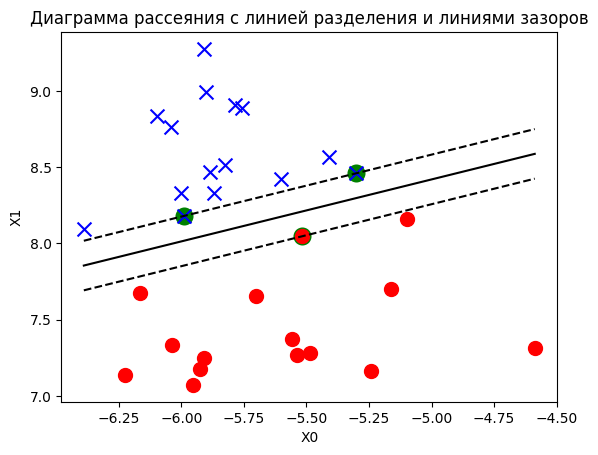

In [ ]:
plt.plot(X0,-svm_linear.intercept_[0]/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0, c='k')

plt.plot(X0,(-svm_linear.intercept_[0]-1)/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0,linestyle='--', c='k')
plt.plot(X0,(-svm_linear.intercept_[0]+1)/svm_linear.coef_[0][1]-svm_linear.coef_[0][0]/svm_linear.coef_[0][1]*X0,linestyle='--', c='k')

plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c линией разделения и линиями зазоров")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

## Функция гипотезы

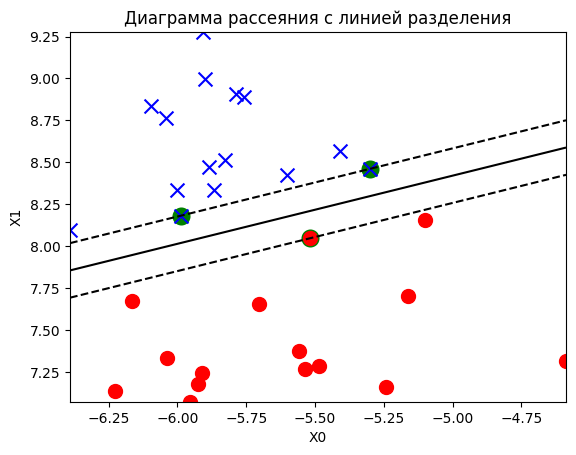

In [ ]:
X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), X.shape[0])
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), X.shape[0])

X0_grid, X1_grid = np.meshgrid(X0, X1)
Z = svm_linear.intercept_[0] + svm_linear.coef_[0][0] * X0_grid +  svm_linear.coef_[0][1] * X1_grid
plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

plt.scatter(svm_linear.support_vectors_[:, 0],svm_linear.support_vectors_[:, 1], linewidth=7, facecolors='green')

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния c линией разделения")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

In [ ]:
model = SVC(kernel='linear')
model.fit(X, y)

SVC(kernel='linear')

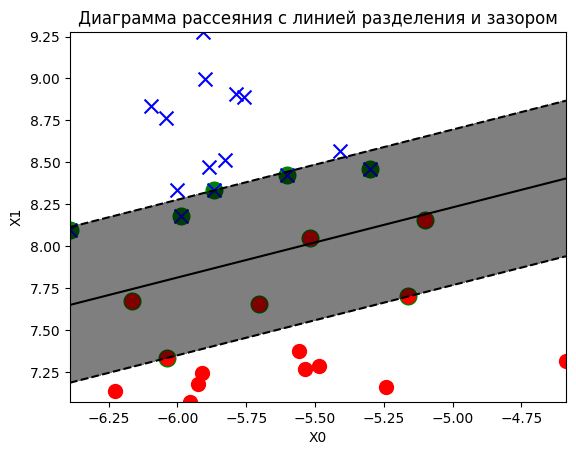

In [ ]:
def plot_decision_regions(X, y, model):
    plt.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1], linewidth=7, facecolors='green')

    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

    X0 = np.linspace(X[:, 0].min(),X[:, 0].max(), X.shape[0])
    X1 = np.linspace(X[:, 1].min(),X[:, 1].max(), X.shape[0])

    X0_grid, X1_grid = np.meshgrid(X0, X1)
    Z = model.decision_function(np.array([X0_grid.ravel(), X1_grid.ravel()]).T).reshape(X0_grid.shape)
    plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    plt.contourf(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], alpha=0.5)

    plt.title("Диаграмма рассеяния c линией разделения и зазором")
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.show()

plot_decision_regions(X, y, model)

## Вектор предсказанных значений целевой переменной

In [ ]:
y_pred =  svm_linear.predict(X)

In [ ]:
metrics.accuracy_score(y, y_pred)

1.0

In [ ]:
metrics.confusion_matrix(y, y_pred)

array([[15,  0],
       [ 0, 15]])

## Работа модели на новой точке

In [ ]:
# создание новой точки данных
observation_new = [[-5.25, 7.5]]

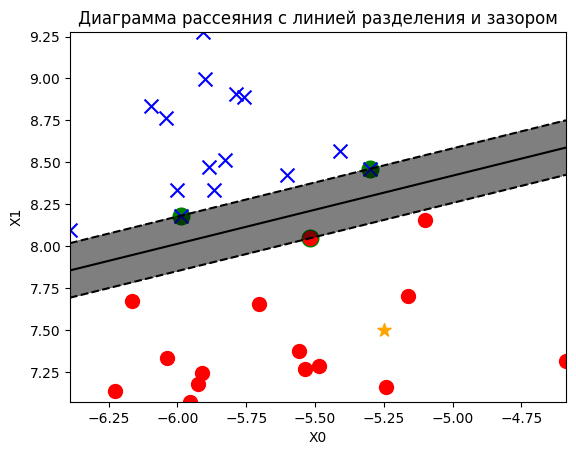

In [ ]:
plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', s=100, color='orange')
plot_decision_regions(X, y, svm_linear)

In [ ]:
# значение функции гипотезы в этой точке
svm_linear.decision_function(observation_new)

array([-5.03131797])

In [ ]:
# предсказание класса
svm_linear.predict(observation_new)

array([0])

Модель работает

# Линейно неразделимые данные с зазором


## Генерация нового датасета



In [ ]:
from sklearn.datasets import make_circles


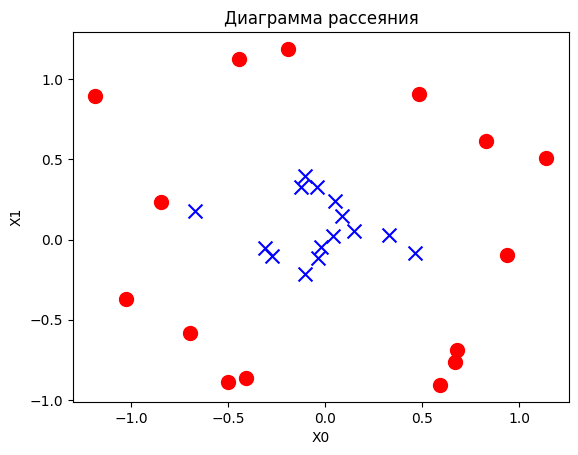

In [ ]:
X, y = make_circles(n_samples=30, random_state=5, factor=.1, noise=.2)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

## Метод опорных векторов в гауссовым ядром

In [ ]:
svm_rbf = SVC(kernel='rbf', C=100).fit(X, y)

In [ ]:
# вывод данных о векторах
svm_rbf.n_support_
svm_rbf.support_
svm_rbf.support_vectors_

array([[ 0.9388294 , -0.09554628],
       [-0.84682371,  0.23287306],
       [-0.19166925,  1.18895776],
       [-0.69539045, -0.58523359],
       [ 0.68060508, -0.68615145],
       [ 0.48354792,  0.91063288],
       [-0.66975235,  0.17866445],
       [ 0.46427295, -0.08540628]])

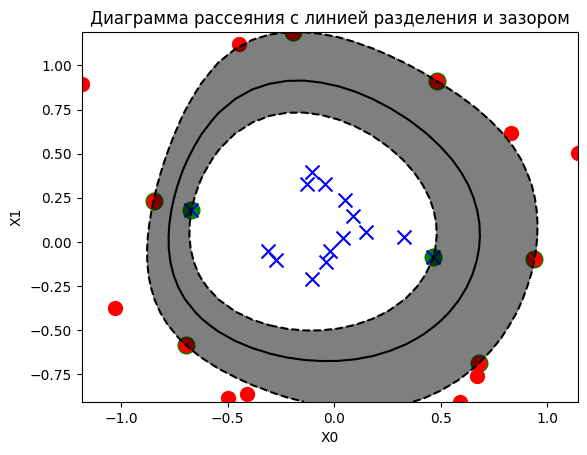

In [ ]:
plot_decision_regions(X, y, svm_rbf)

In [ ]:
# метрики данной модели
metrics.accuracy_score(y, y_pred)
metrics.confusion_matrix(y, y_pred)

array([[7, 8],
       [8, 7]])

# Данные без зазора


## Генерация нового датасета

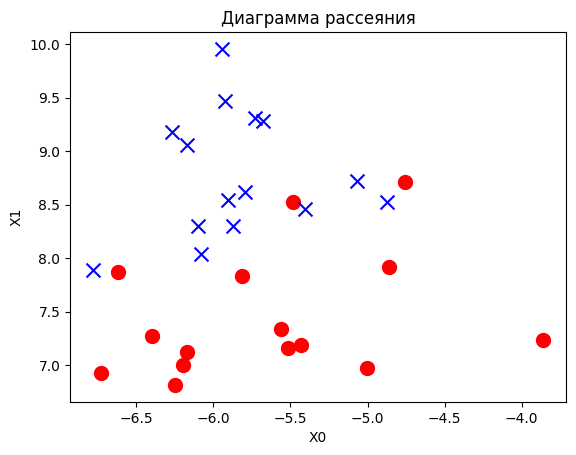

In [ ]:
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.7)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

plt.title("Диаграмма рассеяния")
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

## Метод опорных векторов с мягким зазором

In [ ]:
svm_poly = SVC(kernel='poly', degree=4, C=2).fit(X, y)

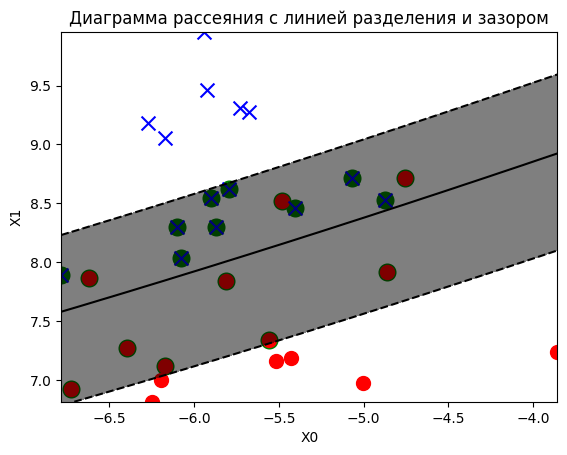

In [ ]:
plot_decision_regions(X, y, svm_poly)

In [ ]:
# Опорные вектора
svm_poly.n_support_

array([9, 9], dtype=int32)

In [ ]:
# Основные метрики
metrics.accuracy_score(y, y_pred)
metrics.confusion_matrix(y, y_pred)

array([[15,  0],
       [ 0, 15]])

# Задания для самостоятельного выполнения


## 1. В первом задании поэкспериментируйте с различными значениями аргумента C класса SVC. Сделайте вывод о том, как он влияет на модель классификации.

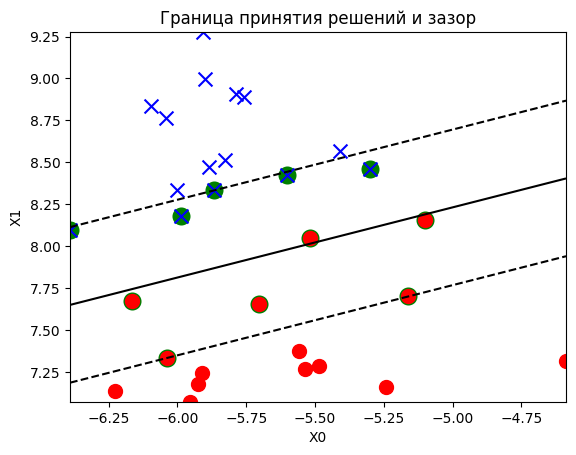

Для C=1: точность=0.9666666666666667
Матрица ошибок:
[[14  1]
 [ 0 15]]


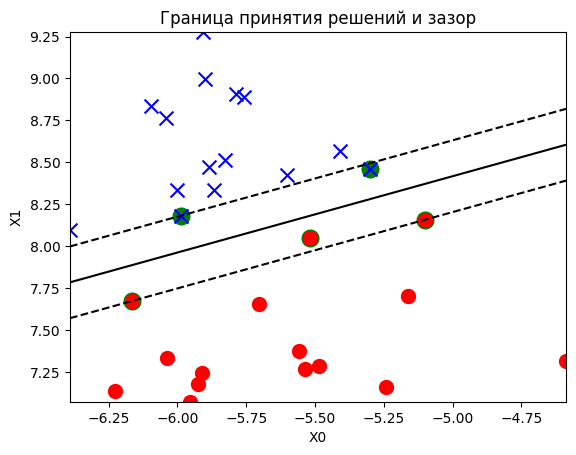

Для C=10: точность=1.0
Матрица ошибок:
[[15  0]
 [ 0 15]]


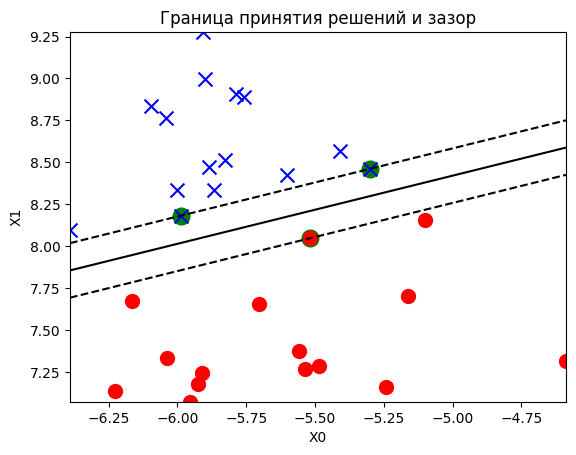

Для C=100: точность=1.0
Матрица ошибок:
[[15  0]
 [ 0 15]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Генерируем линейноразделимый датасет
X, y = make_blobs(n_features=2, n_samples=30, centers=2, random_state=5, cluster_std=0.4)

# Функция для построения разделяющей границы и зазора
def plot_decision_regions(X, y, model):
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], linewidth=7, facecolors='green')
    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)

    X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), X.shape[0])
    X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), X.shape[0])

    X0_grid, X1_grid = np.meshgrid(X0, X1)
    Z = model.decision_function(np.array([X0_grid.ravel(), X1_grid.ravel()]).T).reshape(X0_grid.shape)
    plt.contour(X0_grid, X1_grid, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

    plt.title("Граница принятия решений и зазор")
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.show()

# Исследуем значения C = 1, 10 и 100
for C_val in [1, 10, 100]:
    svm_linear = SVC(kernel='linear', C=C_val)
    svm_linear.fit(X, y)
    y_pred = svm_linear.predict(X)

    # Визуализация
    plot_decision_regions(X, y, svm_linear)

    # Метрики точности
    print(f'Для C={C_val}: точность={accuracy_score(y, y_pred)}')
    print('Матрица ошибок:')
    print(confusion_matrix(y, y_pred))


При C=1 наблюдается небольшая ошибка классификации, что объясняется «мягким зазором». При C=10 и C=100 модель достигает 100% точности на этом наборе данных.


* C = 1 подходит, когда допускается некоторая ошибка, и модель должна быть устойчивой к шуму.
* C = 10 и выше – для жесткого разделения классов, что актуально для чисто линейно разделимых данных.

## 2. В первом задании подвигайте точку нового предсказания. Убедитесь, что с другой стороны границы предсказывается другой класс. Как изменяется предсказание, если точка ляжет внутрь полосы зазора?

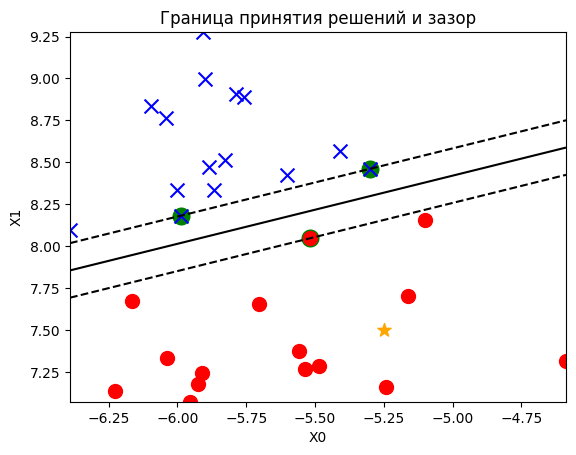

Точка [-5.25, 7.5]: значение функции = -5.031317971753126
Предсказанный класс = 0


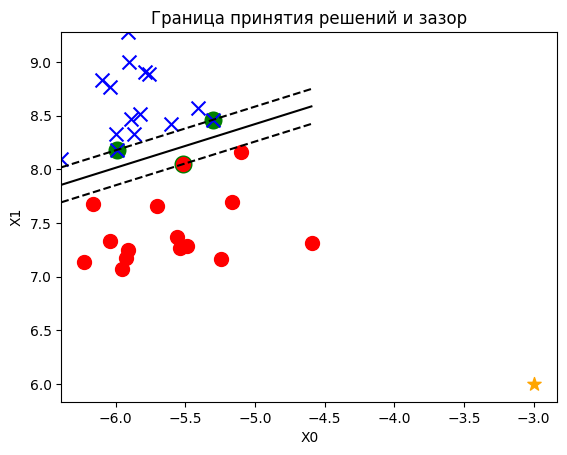

Точка [-3, 6]: значение функции = -19.874783652721632
Предсказанный класс = 0


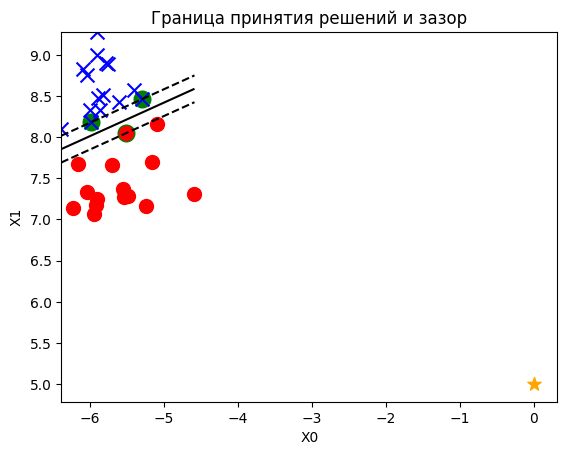

Точка [0, 5]: значение функции = -33.5192393334858
Предсказанный класс = 0


In [ ]:
# Создаем и визуализируем новую точку на графике с изменяющимся положением
positions = [[-5.25, 7.5], [-3, 6], [0, 5]]
for pos in positions:
    plt.scatter(pos[0], pos[1], marker='*', s=100, color='orange')
    plot_decision_regions(X, y, svm_linear)

    print(f'Точка {pos}: значение функции = {svm_linear.decision_function([pos])[0]}')
    print(f'Предсказанный класс = {svm_linear.predict([pos])[0]}')


Обе точки находятся за пределами разделяющей границы.
Если точки переместить в сторону противоположного класса или ближе к разделяющей границе (например, к точкам с нулевым значением функции), то:
* При попадании в область полосы зазора (между линиями -1 и +1) точка может быть более неуверенно классифицирована (например, предсказание класса может зависеть от модели, или функция будет близка к нулю).
* При перемещении на другую сторону границы значение функции станет положительным, и модель предскажет противоположный класс (например, класс 1).

## 3. Во втором задании повторите анализ с методом опорных векторов с другими видами ядер. Сравните вид границы принятия решения и показатели точности модели.

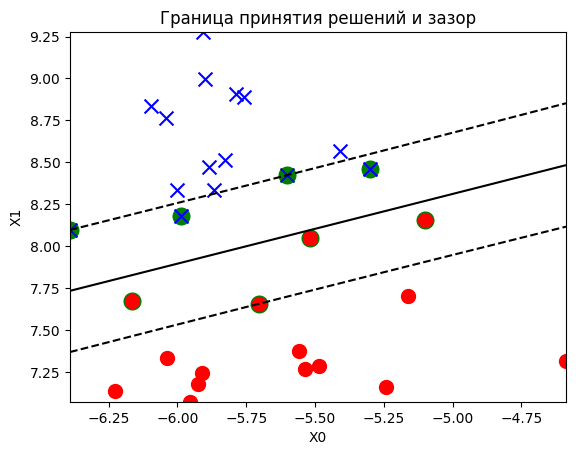

Ядро: rbf
Точность = 1.0
Матрица ошибок:
[[15  0]
 [ 0 15]]


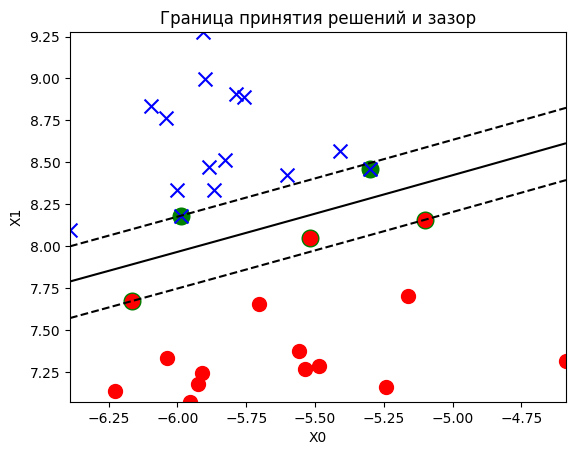

Ядро: poly
Точность = 1.0
Матрица ошибок:
[[15  0]
 [ 0 15]]


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Применим SVM с RBF и полиномиальным ядрами
kernels = ['rbf', 'poly']
for kernel in kernels:
    model = SVC(kernel=kernel, C=100)
    model.fit(X, y)
    y_pred = model.predict(X)

    # Визуализация
    plot_decision_regions(X, y, model)

    # Метрики точности
    print(f'Ядро: {kernel}')
    print(f'Точность = {accuracy_score(y, y_pred)}')
    print('Матрица ошибок:')
    print(confusion_matrix(y, y_pred))


Оба ядра показали отличные результаты на данном наборе данных. Это может говорить о том, что данный набор данных хорошо разделим, и различные ядра могут использоваться для достижения одинаковой производительности.

В реальных задачах выбор между ядрами может зависеть от характера данных и необходимости интерпретации модели. Например, полиномиальное ядро может быть предпочтительным, если мы хотим иметь полиномиальные функции, в то время как RBF лучше подходит для общих случаев.

## 4. В третьем задании поэкспериментируйте со значением аргумента C. Сделайте вывод о том, как он влияет на модель.

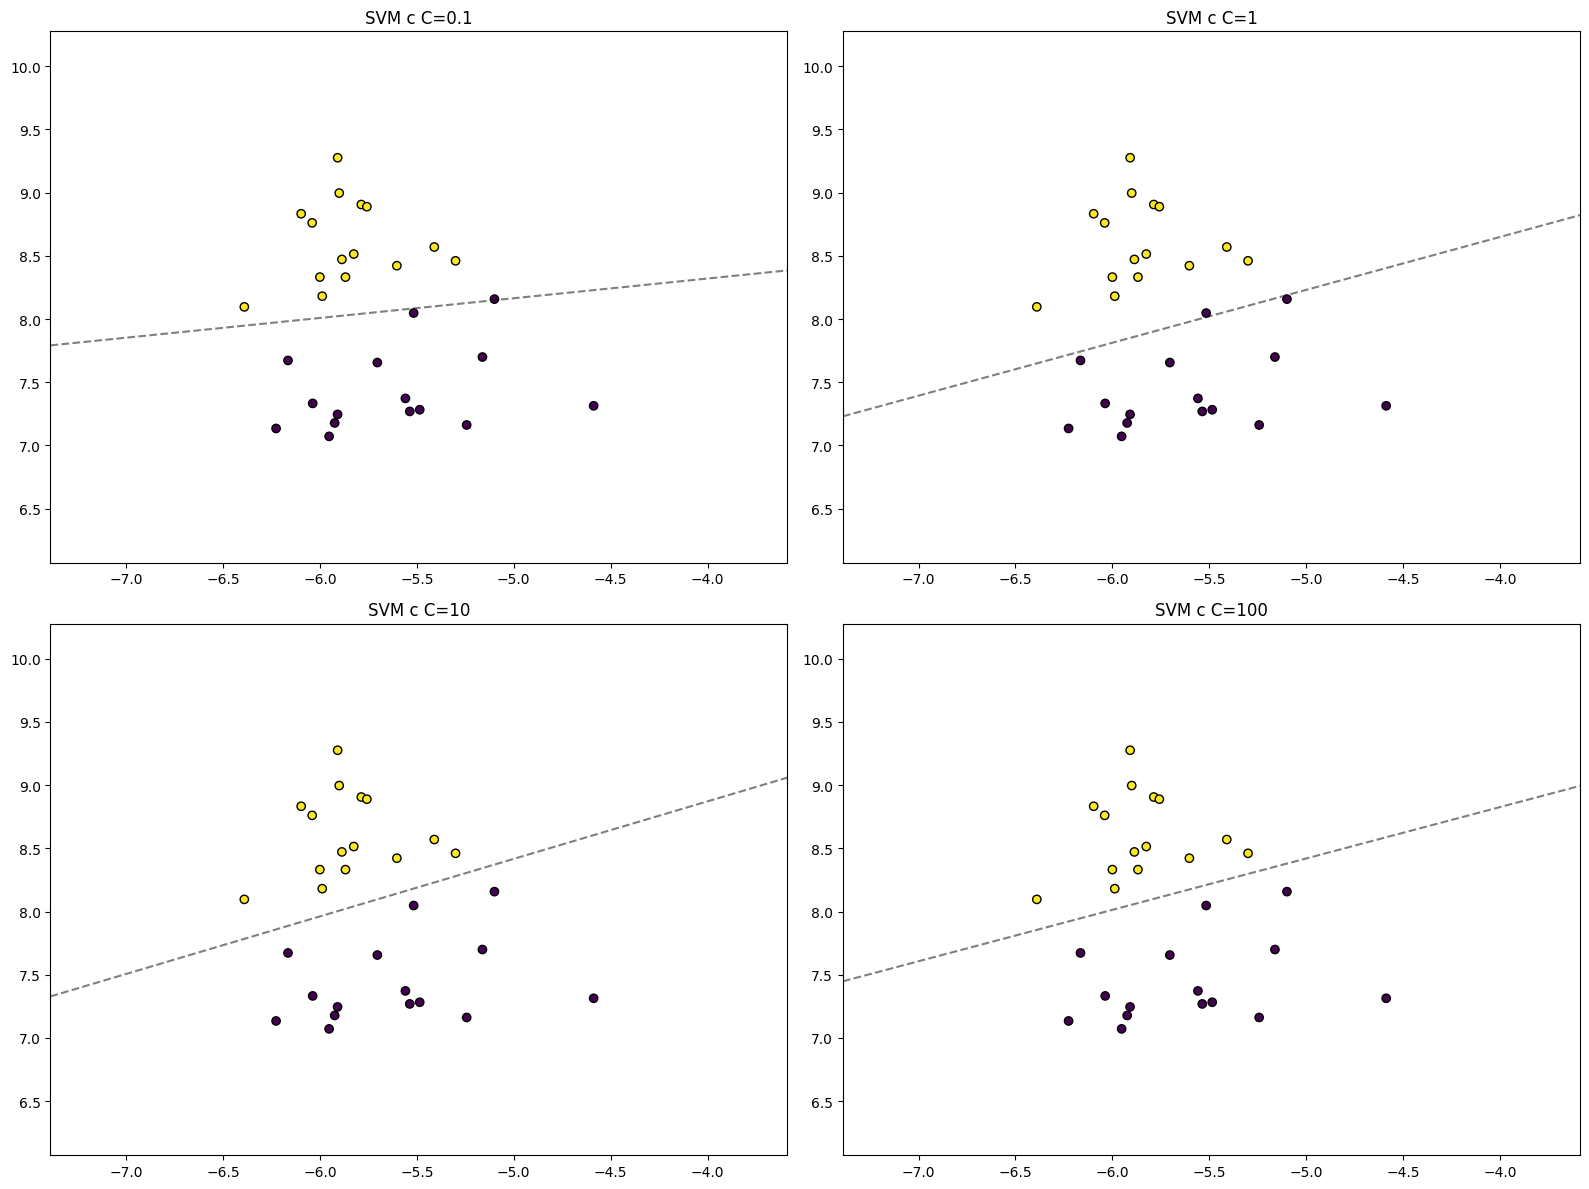

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn import metrics

# Генерация линейно разделимого датасета
X, y = make_blobs(n_samples=30, centers=2, random_state=5, cluster_std=0.4)

# Варианты значений C
C_values = [0.1, 1, 10, 100]

plt.figure(figsize=(16, 12))
for i, C in enumerate(C_values):
    plt.subplot(2, 2, i + 1)
    svm_model = SVC(kernel='linear', C=C).fit(X, y)

    # Граница принятия решения
    xlim = [X[:, 0].min() - 1, X[:, 0].max() + 1]
    ylim = [X[:, 1].min() - 1, X[:, 1].max() + 1]
    XX, YY = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
    Z = svm_model.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)

    plt.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5, linestyles='--')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(f"SVM c C={C}")

plt.tight_layout()
plt.show()


При меньших значениях C граница принятия решения становится более широкой и допускает больше ошибок (мягкий зазор).

При увеличении C модель становится более жесткой, стараясь минимизировать ошибки классификации, что может привести к переобучению.

## 5. В третьем задании примените классификатор без ядра. Познакомьтесь и примените класс Linear_SVC.

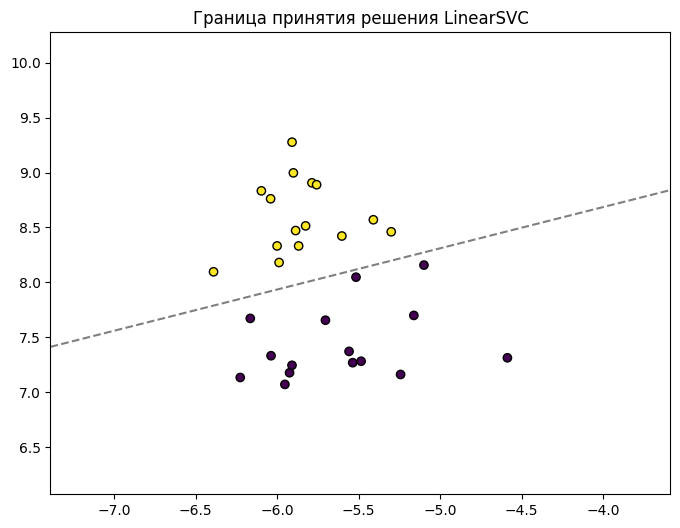

In [ ]:
from sklearn.svm import LinearSVC

# Обучение модели с использованием LinearSVC
linear_svc = LinearSVC(C=100)
linear_svc.fit(X, y)

# Граница принятия решения
plt.figure(figsize=(8, 6))
xlim = [X[:, 0].min() - 1, X[:, 0].max() + 1]
ylim = [X[:, 1].min() - 1, X[:, 1].max() + 1]
XX, YY = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = linear_svc.decision_function(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)

plt.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5, linestyles='--')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
plt.title("Граница принятия решения LinearSVC")
plt.show()


## 6. Сгенерируйте датасет для классификации из 1000 точек и 5 атрибутов. Попробуйте применить метод опорных векторов на нем. Найдите методом подбора наилучшее ядро и значение С.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

# Генерация датасета
X, y = make_classification(n_samples=1000, n_features=5, n_informative=3, n_redundant=2, random_state=42)

# Подбор гиперпараметров
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X, y)

print(f"Наилучшие параметры: {grid_search.best_params_}")
print(f"Наилучший результат перекрестной проверки: {grid_search.best_score_}")


Наилучшие параметры: {'C': 100, 'kernel': 'rbf'}
Наилучший результат перекрестной проверки: 0.951


## 7. Попробуйте данную модель с большим количеством точек. На каком количестве обучение начинает занимать существенное время?

Размер: 100, Затраты времени: 0.0026 seconds
Размер: 500, Затраты времени: 0.0084 seconds
Размер: 1000, Затраты времени: 0.0186 seconds
Размер: 5000, Затраты времени: 0.3852 seconds
Размер: 10000, Затраты времени: 1.6784 seconds


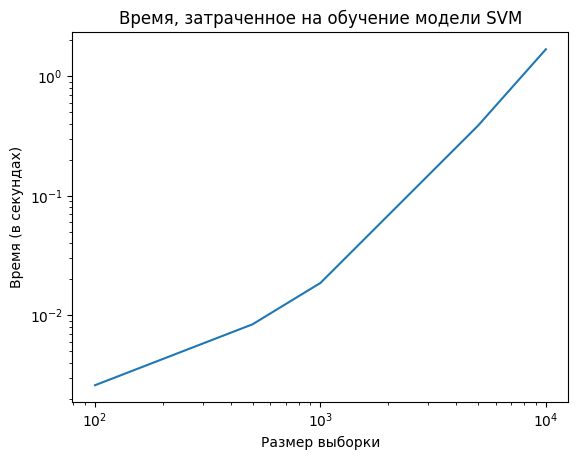

In [ ]:
import time

sample_sizes = [100, 500, 1000, 5000, 10000]
times = []

for size in sample_sizes:
    X, y = make_classification(n_samples=size, n_features=5, n_informative=3, n_redundant=2, random_state=42)

    start_time = time.time()
    svm_model = SVC(kernel='rbf', C=10)
    svm_model.fit(X, y)
    elapsed_time = time.time() - start_time
    times.append(elapsed_time)
    print(f"Размер: {size}, Затраты времени: {elapsed_time:.4f} seconds")

plt.plot(sample_sizes, times)
plt.xlabel('Размер выборки')
plt.ylabel('Время (в секундах)')
plt.title('Время, затраченное на обучение модели SVM')
plt.xscale('log')
plt.yscale('log')
plt.show()


Время увеличивается с увеличением количества точек

## 8. Примените метод опорных векторов для задачи множественной классификации. Самостоятельно сгенерируйте визуализируемый датасет для этой задачи. Поробуйте изобразить границу принятия решений и зазор.

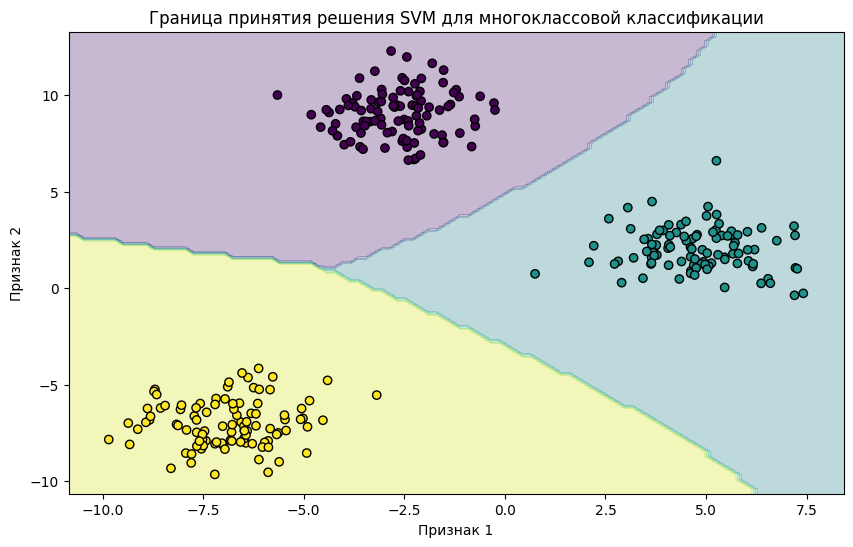

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

# Генерация датасета для множественной классификации
X, y = make_blobs(n_samples=300, centers=3, random_state=42, cluster_std=1.2)

# Обучение модели SVM с RBF ядром
svm_model = SVC(kernel='rbf', C=1)
svm_model.fit(X, y)

# Определение границы принятия решений
xlim = [X[:, 0].min() - 1, X[:, 0].max() + 1]
ylim = [X[:, 1].min() - 1, X[:, 1].max() + 1]
XX, YY = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = svm_model.predict(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)

# Визуализация границы принятия решений
plt.figure(figsize=(10, 6))
plt.contourf(XX, YY, Z, alpha=0.3, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
plt.title("Граница принятия решения SVM для многоклассовой классификации")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.show()


## 9. Выберите из библиотеки sklearn готовый датасет для классификации и попробуйте смоделировать его при помощи метода опорных векторов.

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Загрузка датасета Ирисов
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели SVM
svm_model = SVC(kernel='rbf', C=1)
svm_model.fit(X_train, y_train)

# Прогнозирование и оценка модели
y_pred = svm_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## 10. Повторите такой же анализ для задачи регрессии и соответствующего датасета.

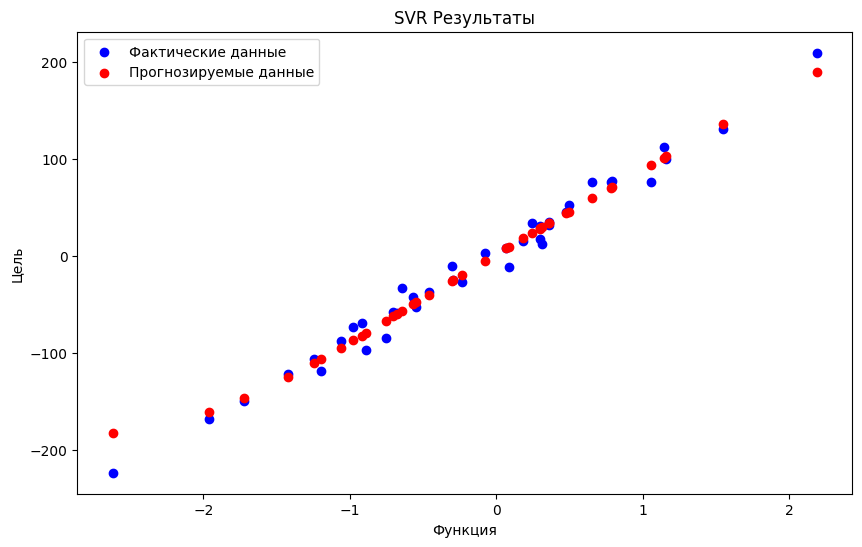

Среднеквадратичная ошибка: 155.33


In [ ]:
from sklearn.datasets import make_regression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Генерация регрессионного датасета
X, y = make_regression(n_samples=200, n_features=1, noise=10, random_state=42)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели SVR
svr_model = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_model.fit(X_train, y_train)

# Прогнозирование
y_pred = svr_model.predict(X_test)

# Визуализация результата
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Фактические данные')
plt.scatter(X_test, y_pred, color='red', label='Прогнозируемые данные')
plt.title("SVR Результаты")
plt.xlabel("Функция")
plt.ylabel("Цель")
plt.legend()
plt.show()

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
print(f"Среднеквадратичная ошибка: {mse:.2f}")


# Контрольные вопросы

## 1. Чем отличается класс SVC и LinearSVC в библиотеке sklearn при использовании метода опорных векторов без ядра?

Класс `SVC` (Support Vector Classification) предназначен для работы с любыми ядрами, включая линейные и нелинейные. Он позволяет использовать разные функции ядра (например, RBF, полиномиальные и др.) и поддерживает более сложные настройки, такие как выбор параметров ядра.

Класс `LinearSVC`, с другой стороны, оптимизирован исключительно для линейных разделяющих гиперплоскостей. Он работает быстрее и лучше подходит для больших наборов данных, так как использует алгоритм стохастического градиентного спуска для обучения. Однако он не поддерживает функции ядра, кроме линейной, и имеет некоторые ограничения, такие как невозможность работы с некоторыми параметрами, доступными в `SVC`.

## 2. Чем отличается метод опорных векторов с разными ядрами? Как выбор функции ядра влияет на форму границы принятия решения?

Метод опорных векторов (SVM) использует ядра для преобразования данных в более высокоразмерные пространства, чтобы облегчить разделение классов. Разные функции ядра имеют разные способы, которыми они обрабатывают данные:

- **Линейное ядро.** Применяется, когда данные линейно разделимы. Граница принятия решения будет прямой.
  
- **Полиномиальное ядро.** Создает более сложные границы, позволяя модели улавливать полиномиальные зависимости между признаками.

- **RBF (радиально-базисное) ядро.** Предоставляет большую гибкость, позволяя модели создавать кривые границы. Это ядро отлично подходит для обработки нелинейно разделимых данных.

Выбор функции ядра значительно влияет на форму границы принятия решения, так как она определяет, как данные будут интерпретироваться в новом пространстве, и, следовательно, как SVM будет пытаться отделить классы.

## 3. Как метод опорных векторов работает в задачах множественной классификации?

Метод опорных векторов в задачах множественной классификации обычно реализуется с помощью стратегий "один против всех" (OvA) или "один против одного" (OvO):

- **Один против всех (OvA).** Для каждой категории обучается отдельный классификатор, который определяет, принадлежит ли данный образец к этой категории или нет. В конечном итоге выбирается категория с наивысшей оценкой.

- **Один против одного (OvO).** Для каждой пары классов обучается отдельный классификатор. Это приводит к большему количеству классификаторов, но может обеспечить лучшую точность, так как каждый классификатор фокусируется только на различиях между двумя классами.

Метод опорных векторов объединяет результаты всех классификаторов для определения конечного класса для каждого примера.

## 4. Как метод опорных векторов может быть использован для решения задачи регрессии?


Метод опорных векторов для регрессии реализуется с помощью класса `SVR` (Support Vector Regression). В отличие от классификации, где цель состоит в разделении классов, задача регрессии заключается в предсказании непрерывной переменной.

`SVR` работает, пытаясь найти гиперплоскость, которая минимизирует ошибку предсказания в пределах заданного зазора (epsilon). Она определяет, как далеко предсказанные значения могут отклоняться от фактических, при этом стремясь сохранить простоту модели. В результате `SVR` может эффективно работать с данными, имеющими шум, и предоставляет robust (устойчивые) предсказания. Выбор ядра также важен, так как он определяет, как регрессионная функция будет адаптироваться к данным.


# Дополнительные задания

## 1. Сделайте рефакторинг кода, рисующего график границы принятия решения и зазора для метода опорных векторов.

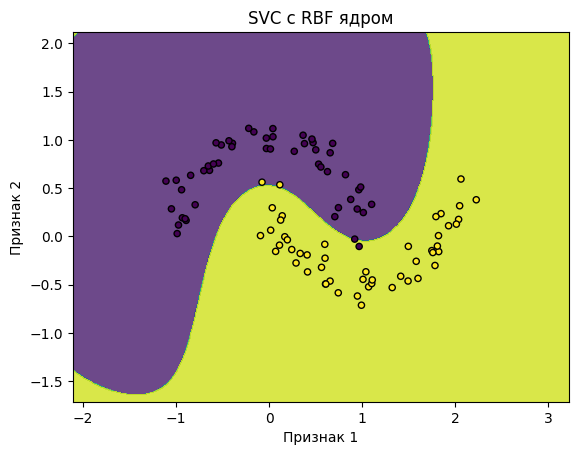

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

def plot_decision_boundary(clf, X, y, title = ""):
    # Создаем сетку для графика
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    # Предсказание классов по сетке
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Рисуем контур и Training points
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=20)
    plt.title(title)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Признак 1')
    plt.ylabel('Признак 2')
    plt.show()

# Пример использования функции
X, y = datasets.make_moons(n_samples=100, noise=0.1)
clf = SVC(kernel='rbf', C=1.0)
clf.fit(X, y)
plot_decision_boundary(clf, X, y, title="SVC с RBF ядром")


## 2. Замерьте зависимость времени обучения метода опорных векторов от количества точек в датасете. Сделайте это для разных типов ядер. Представьте результаты наглядно.

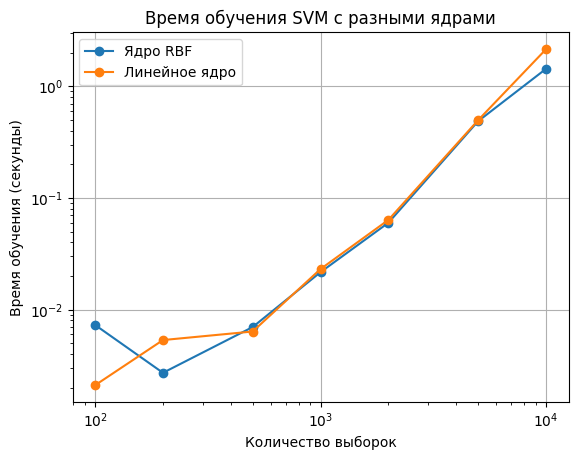

In [ ]:
import time
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification

n_samples = [100, 200, 500, 1000, 2000, 5000, 10000]
times_rbf = []
times_linear = []

for n in n_samples:
    X, y = make_classification(n_samples=n, n_features=2, n_informative=2, n_redundant=0, random_state=42)

    # Время обучения для RBF ядра
    start_time = time.time()
    clf_rbf = SVC(kernel='rbf')
    clf_rbf.fit(X, y)
    times_rbf.append(time.time() - start_time)

    # Время обучения для линейного ядра
    start_time = time.time()
    clf_linear = SVC(kernel='linear')
    clf_linear.fit(X, y)
    times_linear.append(time.time() - start_time)

# Визуализация
plt.plot(n_samples, times_rbf, label='Ядро RBF', marker='o')
plt.plot(n_samples, times_linear, label='Линейное ядро', marker='o')
plt.xlabel('Количество выборок')
plt.ylabel('Время обучения (секунды)')
plt.title('Время обучения SVM с разными ядрами')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.show()


## 3. Для последних двух заданий из самостояельных сравните производительность метода опорных векторов и других методов классификации.

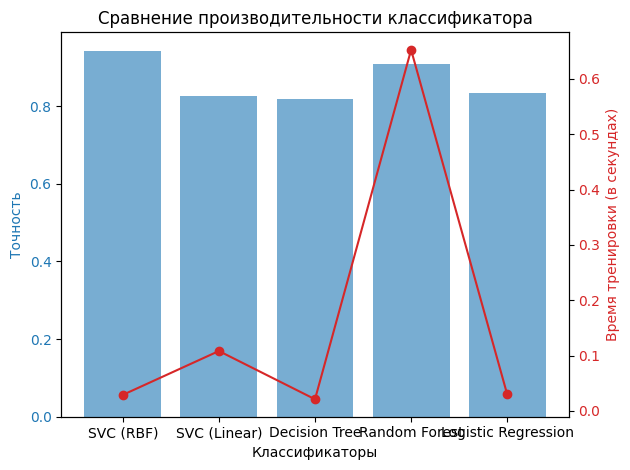

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Генерация данных
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Список классификаторов
classifiers = {
    'SVC (RBF)': SVC(kernel='rbf'),
    'SVC (Linear)': SVC(kernel='linear'),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

results = {}

# Обучение и оценка
for name, clf in classifiers.items():
    start_time = time.time()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    training_time = time.time() - start_time
    results[name] = {'accuracy': accuracy, 'time': training_time}

# Визуализация результатов
names = list(results.keys())
accuracies = [results[name]['accuracy'] for name in names]
times = [results[name]['time'] for name in names]

fig, ax1 = plt.subplots()

# Плотим точности
ax1.set_xlabel('Классификаторы')
ax1.set_ylabel('Точность', color='tab:blue')
ax1.bar(names, accuracies, color='tab:blue', alpha=0.6, label='Accuracy')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Создаем второй ось для времени
ax2 = ax1.twinx()
ax2.set_ylabel('Время тренировки (в секундах)', color='tab:red')
ax2.plot(names, times, color='tab:red', marker='o', label='Время тренировки')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Сравнение производительности классификатора')
fig.tight_layout()
plt.show()
